# Linear Regression

In [1]:
# Package Setup
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# User: set up some general stuff
path = 'https://raw.githubusercontent.com/negarfazeli/energy-prediction/master/'

train_start_date = '2001-01-01'
train_end_date = '2014-12-01'
test_start_date = '2015-01-01'
test_end_date = '2017-07-01'

features = ['Biofuels.Consump.TrillBTU.',
 'Total.Biomass.Consump.TrillBTU.',
 'Bio.Prod.Trillion.BTU.',
 'BioMass.Prod.Trill.BTU.',
 'Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.',
 'GDP',
 'GeoConsump.TrillBtu.',
 'GenCalifornia...other.thousand.megawatthours',
 'Total.Renewable.Consump.TrillBTU.',
 'Total.RenProd..TrillBtu.',
 'WasteConsump.TrillBTU.',
 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.',
 'Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',
 'PrCalifornia...all.sectors.cents.per.kilowatthour',
 'Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.',
 'Electricity.Imports..Billion.Kilowatthours.',
 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.',
 'WindConsump.TrillBTU.',
 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.',
 'GenCalifornia...petroleum.coke.thousand.megawatthours',
 'Electricity.Net.Imports..Billion.Kilowatthours.',
 'Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.']

## Prepare Data

In [3]:
# Load Data
df = pd.read_csv(path+'final.csv')

In [4]:
# Format Month Column and Set as Index

# a function to modify the format of the date 
def modify_data(s):
    if len(s)==6:
        s = s[:4]+'20'+s[4:]
    else:
        s = s[:4]+'200'+s[4:]
    return(s)
df['Month'] = df['Month'].apply(modify_data)

# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as index
df.index = df.Month

# Drop 'Month' column
df = df.drop('Month', axis=1)

In [5]:
print('Outcome Variable: Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.')

Outcome Variable: Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.


In [6]:
# Split into X and y
X = df.drop("Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.", axis=1) # Input Variables
y = df["Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes."]              # Outcome Variable

In [7]:
# Drop Features we aren't using
X = X[features]

In [8]:
# Split into train and test
X_train = X[train_end_date:train_start_date]
X_test = X[test_end_date:test_start_date]

y_train = y[train_end_date:train_start_date]
y_test = y[test_end_date:test_start_date]

## Visualize Data to check for linear relationships

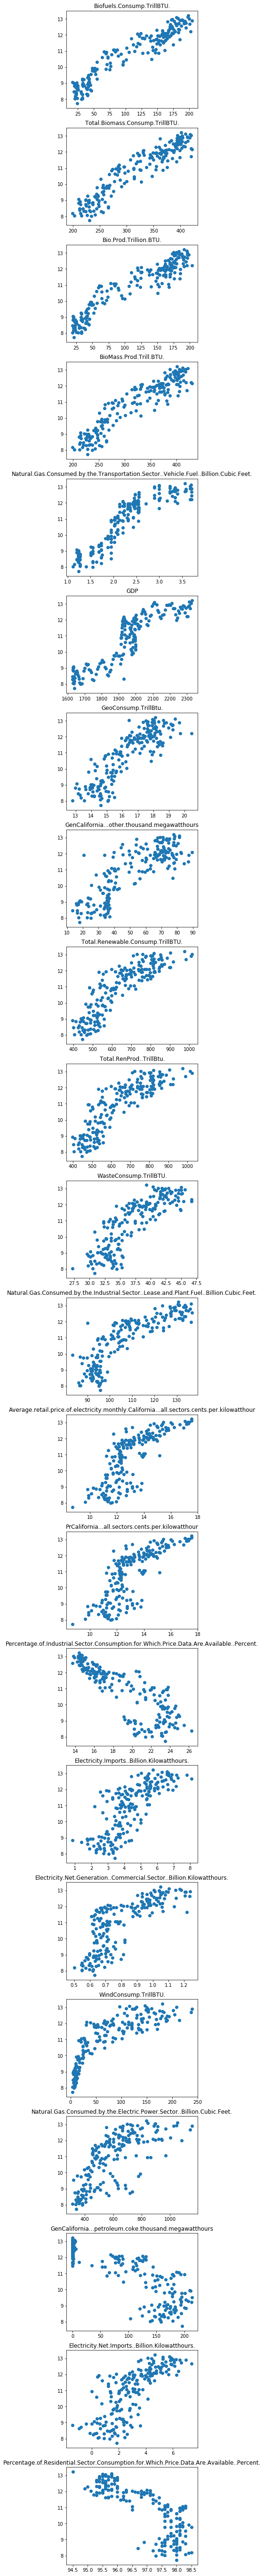

In [9]:
# Plot Features vs. Data to understand if there are linear relationships
# Dimensions os subplot need fixed - for now, use individual plots

plt.figure(figsize = (5,100))

# Create list of subplot names
subplotnames = []
for i in range(len(features)):
    subplotnames += ['subplot' + str(i)]                 # put name of subplot in list, e.g. 'subplot0'
    subplotnames[i] = plt.subplot(len(features), 1, i+1) # initialize subplot, e.g. subplot0 = plt.subplot(22, 1, 1)

# Scatter plot for each feature
for i in range(len(features)):
    x_pts = X.iloc[:,i]
    y_pts = y
    subplotnames[i].scatter(x_pts, y)
    subplotnames[i].set_title(X.columns.values[i]);

## Train Linear Regression Model

In [10]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)

Intercept: 
 17.286327564830035
Coefficients: 
 [ 2.66753464e+01 -3.30918520e+01 -2.66514194e+01  3.30789746e+01
  4.59779903e-01  3.19790609e-03 -9.70528617e-02 -3.21269468e-03
  6.43840211e+00 -6.43739008e+00 -1.52808447e-02  1.22266573e-02
  7.57754171e-02  7.57754171e-02 -4.68676657e-02  4.65264535e-02
 -1.87590994e+00  3.16047966e-03  1.69754023e-03  3.99995699e-03
 -1.97815416e-02 -1.34609875e-01]


In [11]:
# Predict y's
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# 1) RMSE on Training Data
from sklearn.metrics import mean_squared_error
print("MSE, Training Data: %.2f"
      % mean_squared_error(y_train, y_train_pred))

# 2) RMSE on Test Data
print("MSE, Test Data: %.2f"
      % mean_squared_error(y_test, y_test_pred))

MSE, Training Data: 0.05
MSE, Test Data: 16708.30


In [12]:
# Plot predictions vs actual
y_train_pred.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'